In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Changing Colorspaces

For color conversion, cv2.cvtColot(image, flag) is used, where flag determines the type of conversion.

In [2]:
[i for i in dir(cv2) if i.startswith('COLOR_')]

['COLOR_BAYER_BG2BGR',
 'COLOR_BAYER_BG2BGRA',
 'COLOR_BAYER_BG2BGR_EA',
 'COLOR_BAYER_BG2BGR_VNG',
 'COLOR_BAYER_BG2GRAY',
 'COLOR_BAYER_BG2RGB',
 'COLOR_BAYER_BG2RGBA',
 'COLOR_BAYER_BG2RGB_EA',
 'COLOR_BAYER_BG2RGB_VNG',
 'COLOR_BAYER_GB2BGR',
 'COLOR_BAYER_GB2BGRA',
 'COLOR_BAYER_GB2BGR_EA',
 'COLOR_BAYER_GB2BGR_VNG',
 'COLOR_BAYER_GB2GRAY',
 'COLOR_BAYER_GB2RGB',
 'COLOR_BAYER_GB2RGBA',
 'COLOR_BAYER_GB2RGB_EA',
 'COLOR_BAYER_GB2RGB_VNG',
 'COLOR_BAYER_GR2BGR',
 'COLOR_BAYER_GR2BGRA',
 'COLOR_BAYER_GR2BGR_EA',
 'COLOR_BAYER_GR2BGR_VNG',
 'COLOR_BAYER_GR2GRAY',
 'COLOR_BAYER_GR2RGB',
 'COLOR_BAYER_GR2RGBA',
 'COLOR_BAYER_GR2RGB_EA',
 'COLOR_BAYER_GR2RGB_VNG',
 'COLOR_BAYER_RG2BGR',
 'COLOR_BAYER_RG2BGRA',
 'COLOR_BAYER_RG2BGR_EA',
 'COLOR_BAYER_RG2BGR_VNG',
 'COLOR_BAYER_RG2GRAY',
 'COLOR_BAYER_RG2RGB',
 'COLOR_BAYER_RG2RGBA',
 'COLOR_BAYER_RG2RGB_EA',
 'COLOR_BAYER_RG2RGB_VNG',
 'COLOR_BGR2BGR555',
 'COLOR_BGR2BGR565',
 'COLOR_BGR2BGRA',
 'COLOR_BGR2GRAY',
 'COLOR_BGR2HLS',
 'COLO

>  For HSV, Hue range is [0,179], Saturation range is [0,255] and Value range is [0,255]. Different softwares use different scales. So if you are comparing OpenCV values with them, you need to normalize these ranges.

##### Object Tracking

In HSV, it is more easier to represent a color than RGB color-space. In our application, we will try to extract a blue colored object

In [10]:
img = cv2.imread('images/tiger.jpg')
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
hue, saturation, value = cv2.split(hsv)
hue.shape


(194, 259)

In [21]:
#Change the paramater to zero if you only have one camera
cap = cv2.VideoCapture(1)

while(1):
    
    _, frame = cap.read()
    
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    lower_red = np.array([10, 100, 100])
    upper_red = np.array([179, 255, 255])
    
    mask = cv2.inRange(hsv, lower_red, upper_red)
    
    res = cv2.bitwise_and(frame, frame, mask=mask)
    
    cv2.imshow('frame', frame)
    cv2.imshow('mask', mask)
    cv2.imshow('res', res)
    
    if cv2.waitKey(1) & 0xff == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

##### How to find HSV values to track

In [22]:
red = np.uint8([[[255, 255, 255]]])
hsv_red = cv2.cvtColor(red, cv2.COLOR_BGR2HSV)
hsv_red

array([[[  0,   0, 255]]], dtype=uint8)

Now you take [H-10, 100,100] and [H+10, 255, 255] as lower bound and upper bound respectively. Remeber to change HSV ranges. In OpenCV H has values from 0 to 180, S and V from 0 to 255.

In [16]:
red = np.uint8([[[255, 255, 255]]])
hsv_red = cv2.cvtColor(red, cv2.COLOR_BGR2HSV)
hsv_red

array([[[  0,   0, 255]]], dtype=uint8)

### Geometric Transformations of Images

Two important opencv functions for transformations:
- **cv2.warpAffine()**: takes a 2 x 3 transformation matrix
- **cv2.warpPerspective**: takes a 3 x 3 transformation matrix

##### Scaling

Scaling is just resizing of the image. OpenCV  comes with a function cv2.resize(). The size of the image can be specified manually or you can specify the scaling factor. 
Interpolation Methods:

**cv2.INTER_AREA** for shrinking
**cv2.INTER_CUBIC** and **cv2.INTER_AREA** for ZOOMING

Default **cv2.INTER_LINEAR**

In [34]:
res = cv2.resize(img, None, fx = 3, fy = 2, interpolation = cv2.INTER_CUBIC)
cv2.imshow('img',img)
if cv2.waitKey(0) & 0xff == ord('q'):
    cv2.destroyAllWindows()
cv2.imshow('res',res)
if cv2.waitKey(0) & 0xff == ord('q'):
    cv2.destroyAllWindows()
res.shape

(388, 777, 3)

fx and fy are the scaling factor

In [35]:
height, width = img.shape[:2]
res = cv2.resize(img, (3*width, 2*height), interpolation = cv2.INTER_CUBIC)
cv2.imshow('res',res)
if cv2.waitKey(0) & 0xff == ord('q'):
    cv2.destroyAllWindows()

##### Translation

is the shifting of object's location

m = [[1, 0, tx]. [0, 1, ty]] where tx and ty location of x and y after translation

In [41]:
M = np.float32([[1, 0, 10], [0, 1, 50]])
cols, rows = img.shape[:2]
dst = cv2.warpAffine(img, M, (cols, rows))

cv2.imshow('res',dst)
if cv2.waitKey(0) & 0xff == ord('q'):
    cv2.destroyAllWindows()

> Third Argument of cv2.warpAffine() is the size of the output image, which should be (width, height). 

##### Rotation

In [46]:
M = cv2.getRotationMatrix2D((cols/2, rows/2), 45, 1)
dst = cv2.warpAffine(img, M, (cols, rows))

cv2.imshow('res',dst)
if cv2.waitKey(0) & 0xff == ord('q'):
    cv2.destroyAllWindows()

##### Affine Transformation

In Affine transformation all parallel lines in the original image will still be parallel in the output image. To find the tranformation matrix, we need three points from input image and their corresponding locations in output image. cv2.getAffineTransform will create a 2 x 3 matrix which is to be passed to cv2.warpAffine()

Text(0.5,1,'Output')

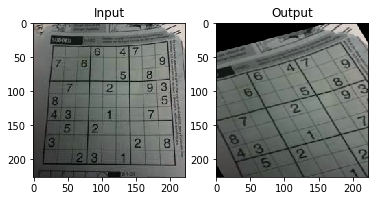

In [52]:
img = cv2.imread('images/sudoku.jpg')
rows, cols, ch = img.shape

pos1 = np.float32([[50, 50], [200, 50], [50, 200]])
pos2 = np.float32([[10, 100], [200, 50], [100, 250]])

M = cv2.getAffineTransform(pos1, pos2)

dst = cv2.warpAffine(img, M, (cols, rows))

plt.subplot(121)
plt.imshow(img)
plt.title('Input')

plt.subplot(122)
plt.imshow(dst)
plt.title('Output')

##### Perspective Transformation

For Perspective Transformation you need 3 x 3 transformation matrix. Straight lines will remain straight even after the transformation. To find this transformation matrix, you need 4 points on the input image and corresponding points on the oupur inage. Among these 4, 3 of them should be collinear. Transormation Matrix can be found by cv2.getPerspectiveTransform().

Text(0.5,1,'Output')

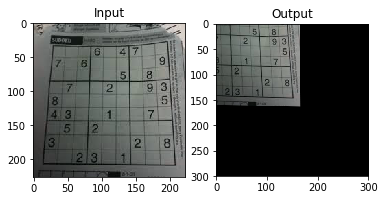

In [56]:
pos1 = np.float32([[56, 65], [368, 52], [28, 387], [389, 390]])
pos2 = np.float32([[0, 0], [300, 0], [0, 300], [300, 300]])

M = cv2.getPerspectiveTransform(pos1, pos2)

dst = cv2.warpPerspective(img, M, (300, 300))

plt.subplot(121)
plt.imshow(img)
plt.title('Input')

plt.subplot(122)
plt.imshow(dst)
plt.title('Output')

### Image Thresholding

##### Simple Thresholding

If pixel value is greater than a theshold value, it is assigned one value else it is assigned another value. **cv2.threshold** is used. The source image must be a **grayscale image**. Threshold value is used to classify the pixels. Third Argument is the maxVal which represents the value to be given if pixel value is more than the threshold value.

Fourth Parameter is a style of thresholding. Different styles are:

- cv2.THRESH_BINARY
- cv2.THRESH_BINARY_INV
- cv2.THRESH_TRUNC
- cv2.THRESH_TOZERO
- cv2.THRESH_TOZERO_INV

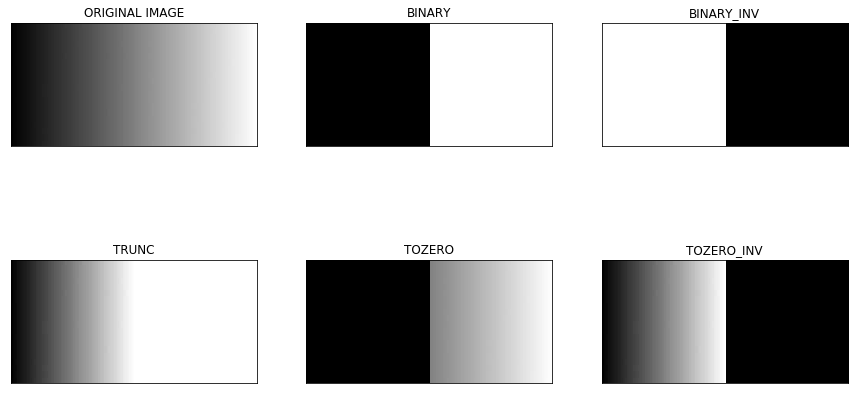

In [14]:
img = cv2.imread('images/gradient.jpg', 0)
plt.figure(figsize=(15, 8))
ret, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)

titles = ['ORIGINAL IMAGE', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

##### Adaptive Thresholding

In simple thresholding we used a global value as a threshold value. In images with different lighting conditions, adaptive thresholding is more appropriate.  The algorithm calculates the threshold for small regions of the image. So we get different thresholds for different regions of the same image and it gives us better results for images with varying illumination.

Adaptive Method_ Decides ow thresholding value is calculated.
- cv2.ADPATIVE_THRESH_MEAN_C: thresh value is the mean of neightbourhood area.
- cv2.ADAPTIVE_THRESH_GAUSSIAN_C: thresh value is the weighted sum of neightbourhood values where weights are a gaussian window.

Block size: Decides size of neighbourhood are.

C - It is just a constant which is subtracted from the mean or wieghted mean calculated.

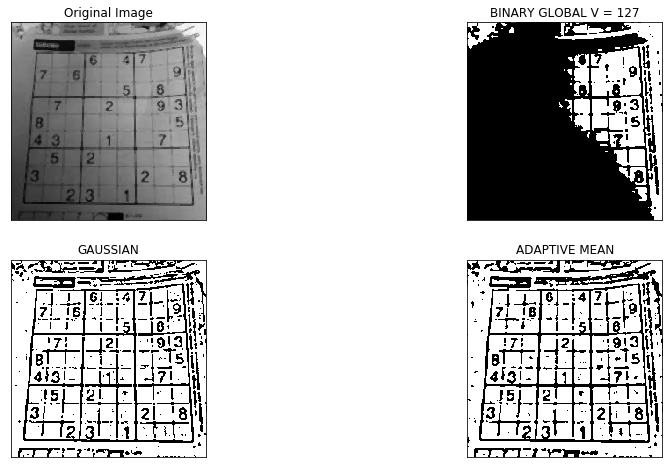

In [22]:
img = cv2.imread('images/sudoku.jpg', 0)
img = cv2.medianBlur(img, 3)

plt.figure(figsize=(15, 8))
ret, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

titles = ['Original Image', 'BINARY GLOBAL V = 127', 'GAUSSIAN', 'ADAPTIVE MEAN']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
    

##### Otsu's Binarization

In global thresholding, we used an arbitrary value. How to be sure if the selected value is good? Trial and Error! Bimodal image has an image whose histogram has two peaks. Got bimodals  we can approximately take a value in the middle of those peaks as a threshold. This is Otsu binarization. It automatically calculates a threshold value from image histogram for a bimodal image. (For images that are not bimodal, binarization will not be accurate)

cv2.THRESH_OTSU flag is used in cv2.threshold. For threshold value, simply pass zero. Then the algorithm finds the optimal threshod value and returns the seconds input that is retVal(we've been getting in this value). If otsu is not used, retVal is same as threshold value.

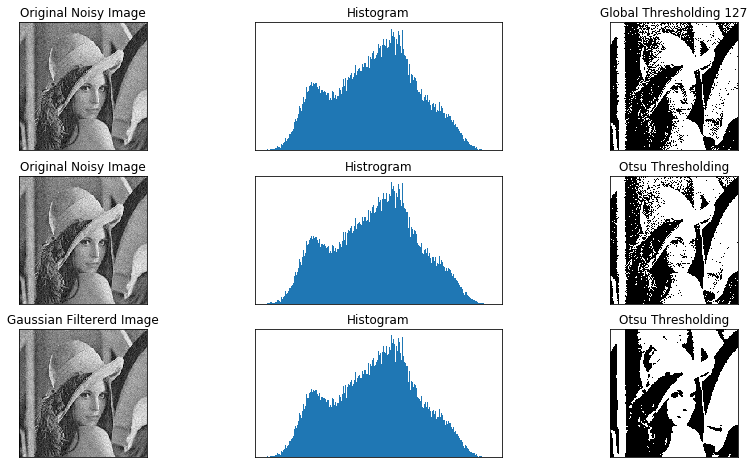

In [29]:
img = cv2.imread('images/woman.jpg', 0)

plt.figure(figsize=(15, 8))
ret1, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

ret2, th2 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

blur = cv2.GaussianBlur(img, (5, 5), 0)
ret3, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

images = [img, 0, th1,
         img, 0, th2,
         img, 0, th3]

titles = ['Original Noisy Image', 'Histogram', 'Global Thresholding 127',
         'Original Noisy Image', 'Histrogram', 'Otsu Thresholding',
         'Gaussian Filtererd Image', 'Histogram', 'Otsu Thresholding']

for i in range(3):
    plt.subplot(3, 3, i*3+1)
    plt.imshow(images[i*3], 'gray')
    plt.title(titles[i*3])
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(3, 3, i*3+2)
    plt.hist(images[i*3].ravel(), 256)
    plt.title(titles[i*3+1])
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(3, 3, i*3+3)
    plt.imshow(images[i*3+2], 'gray')
    plt.title(titles[i*3+2])
    plt.xticks([])
    plt.yticks([])
    

### Smoothing Images

##### 2D Convolution (Image Filtering)

Images can be filtered with various low pass and high pass filters. LPF helps in removing noises. HPF helps in finding edges in the images.

cv2.filter2D() is used to convolve a kernel with an image. 

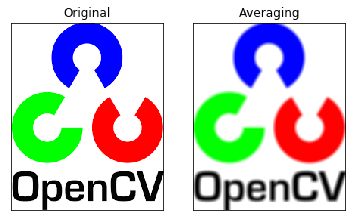

In [8]:
img = cv2.imread('images/opencv_logo.png')

kernel = np.ones((5,5), np.float32)/25
dst = cv2.filter2D(img, -1, kernel)

plt.subplot(121)
plt.imshow(img)
plt.title('Original')
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.imshow(dst)
plt.title('Averaging')
plt.xticks([])
plt.yticks([]);

##### Image Blurring

Image blurring is achieved by convolving the image with a low-pass filter kernel. Useful for removing noises. It actually removes high frequency count (eg: noises, edges) from the image. So edges are blurred a little bit in this operation. There are other blurring techniques which don't blur the edges.

###### 1. Averaging

This is done by convolving image with a normalized box filter. It simply takes the average of all the pixe;s under kernel area and replace the central element. **cv2.blur()** or **cv2.boxFilter()** can be used.

>  If you don’t want to use normalized box filter, use cv2.boxFilter(). Pass an argument normalize=False to the function.

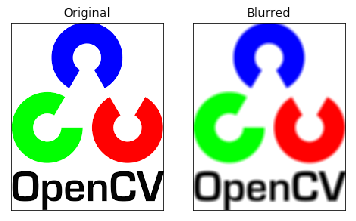

In [11]:
blur = cv2.blur(img, (5,5))

plt.subplot(121)
plt.imshow(img)
plt.title('Original')
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.imshow(blur)
plt.title('Blurred')
plt.xticks([])
plt.yticks([]);

In [13]:
np.array_equal(cv2.blur(img, (5,5)), cv2.filter2D(img, -1, kernel))

True

In [14]:
np.array_equal(dst, blur)

True

##### 2. Gaussian Blurring

Here Gaussian kernel is used using **cv2.GaussianBlur()**. We should specify the width and height of the kernel which should be positive and odd. We also need ot specify standard deviation in X and Y direction, sigmaX and sigmaY respectively. If both are zeros, they are calculated from kernel size. Gaussian blurring is highly effective in removing gaussian noise from the image.

create gaussian kernel using **cv2.getGaussianKernel()**.


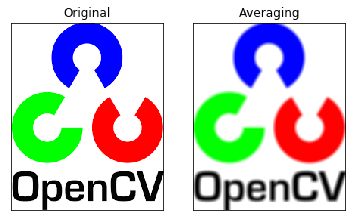

In [15]:
blur = cv2.GaussianBlur(img, (5,5), 0)

plt.subplot(121)
plt.imshow(img)
plt.title('Original')
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.imshow(dst)
plt.title('Gaussian')
plt.xticks([])
plt.yticks([]);

In [16]:
np.array_equal(dst, blur)

False

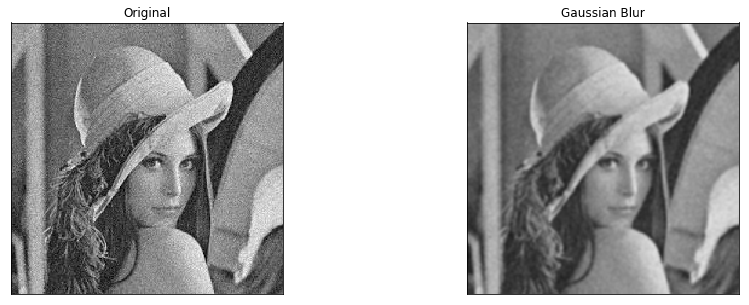

In [29]:
img = cv2.imread('images/woman.jpg')
plt.figure(figsize=(15, 5))
blur = cv2.GaussianBlur(img, (5,5), 0)

plt.subplot(121)
plt.imshow(img)
plt.title('Original')
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.imshow(blur)
plt.title('Gaussian Blur')
plt.xticks([])
plt.yticks([]);

##### 3. Median Blur

**cv2.medianBlur())** takes median of all the pixels under the kernel area and central element is replaced with the median value. This is highly effective against salt-and-pepper noise in the images. The central element in median blurring is always replaced by some pixel value in the image. It reduces noise effectively. 

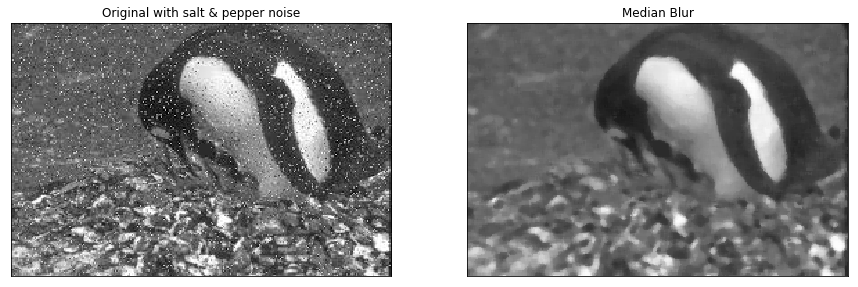

In [19]:
plt.figure(figsize=(15, 5))
img = cv2.imread('images/salt-pepper.jpg')
median = cv2.medianBlur(img, 5)

plt.subplot(121)
plt.imshow(img)
plt.title('Original with salt & pepper noise')
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.imshow(median)
plt.title('Median Blur')
plt.xticks([])
plt.yticks([]);

##### 4. Bilateral Filtering

**cv2.bilateralFilter()** is highly effective in noise removal while keeping edges sharp. Slower compared to other filters. Gaussian filter takes the neighbourhood around the pixel and find its gaussian weighted average. This gaussian filter is a functioon of space alonem that is nerby pixels are considred while filtering. It doesn't consider whether pixels have almost same intensity. It doesn;t consider wheter pizel is an edge pixel. So it blurs the edges also.

Bilateral filter also takes a gaussain filter in space, but one more gaussian filter which is a function of pixel difference. Gaus function of space func of intensity differenc makes sure only nearby pixels are considered for blurring. So it preserves the edges.

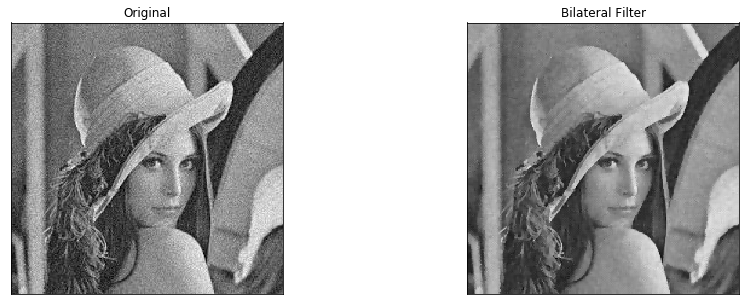

In [28]:
img = cv2.imread('images/woman.jpg')
plt.figure(figsize=(15, 5))
blur = cv2.bilateralFilter(img, 5, 75, 75)
                          
plt.subplot(121)
plt.imshow(img)
plt.title('Original')
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.imshow(blur)
plt.title('Bilateral Filter')
plt.xticks([])
plt.yticks([]);